In [96]:
 
import numpy as np 
import matplotlib.pyplot as plt 

In [97]:
class SingleVector:
    def __init__(self, xBegin, yBegin, xDelta, yDelta ):
        self.xBegin = float(xBegin)
        self.yBegin = float(yBegin)
        self.xDelta = float(xDelta)
        self.yDelta = float(yDelta)
class VectorFieldImage:
    def  __init__(self, width, height):
        self.width = float(width)
        self.height = float(height)
        self.vectorList = []
    def addVector(self, vectorAdd):
        self.vectorList.append(vectorAdd)
    def printAllVectors(self):
        for vector in self.vectorList:
            print(vector.xBegin, vector.yBegin, vector.xEnd, vector.yEnd)
    def graphVectors(self):
        x_begin = []
        y_begin = []
        x_end = []
        y_end = []
        for vector in self.vectorList:
            x_begin.append(vector.xBegin)
            y_begin.append(vector.yBegin)
            x_end.append(vector.xDelta)
            y_end.append(vector.yDelta)
        # plt.quiver(x_begin, y_begin, x_end, y_end, color='k', units='xy', scale=1,  angles = 'xy', scale_units = 'xy', width=0.3, headaxislength= 0.4, headlength = 1, headwidth = 1)
        plt.quiver(x_begin, y_begin, x_end, y_end, color='k', units='xy', scale=1,  angles = 'xy', scale_units = 'xy', width=0.3)

        plt.xlim(0, self.width+5) 
        plt.ylim(0, self.height+5) 
        plt.show()


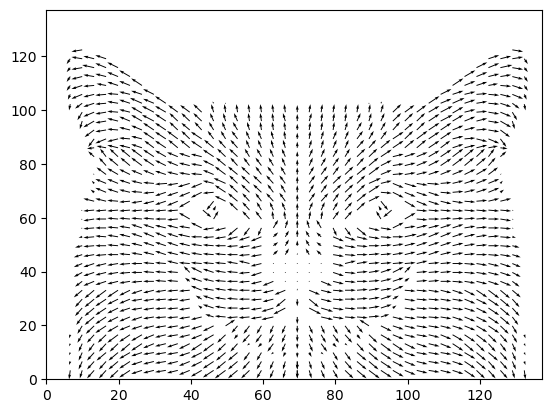

In [98]:
# Write something to convert one type of vector to another
import xml.etree.ElementTree as ET
tree = ET.parse("drawingCatRound2Simple.svg")
root = tree.getroot()

# find all svg namespaces
namespace = {"svg": "http://www.w3.org/2000/svg"}

viewBox = root.get("viewBox")
_, _, width, height = viewBox.split()
baseSVG = VectorFieldImage(width, height)

xCenterLine = 69.453121
# bespoke offset (i Hate SVG layers)?
xOffset = 0.0
yOffset = -164.70832

for path in root.findall(".//svg:path", namespace):
    d_value = path.get("d")
    split_d_value = d_value.split()
    xBegin, yBegin  = split_d_value[1].split(",")
    xEnd, yEnd = split_d_value[2].split(",")
    xBeginParam = float(xBegin) + xOffset
    yBeginParam = float(height) - (float(yBegin) + yOffset)
    # change end param if absolute (M) or relative (m)
    xEndParam = float(xEnd) - float(xBegin) if split_d_value[0] == "M" else float(xEnd)
    yEndParam = float(yBegin) - float(yEnd) if split_d_value[0] == "M" else  - float(yEnd)
    baseSVG.addVector(SingleVector(xBegin = xBeginParam, yBegin = yBeginParam, xDelta = xEndParam, yDelta = yEndParam ))
    # reflect if not centerLine
    if (xBeginParam != xCenterLine):
        xBeginParam = 2 * xCenterLine - xBeginParam
        xEndParam = - xEndParam
        baseSVG.addVector(SingleVector(xBegin = xBeginParam, yBegin = yBeginParam, xDelta = xEndParam, yDelta = yEndParam ))





baseSVG.graphVectors()

<bound method VectorFieldImage.printAllVectors of <__main__.VectorFieldImage object at 0x000001C9AF42D450>>

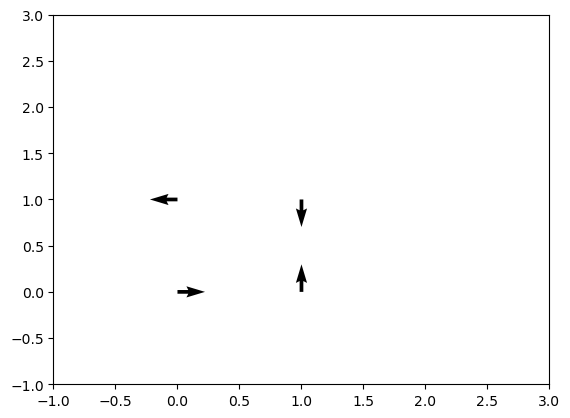